<a href="https://colab.research.google.com/github/AMEERKOTTA/hands_on_machine_learning_with_sklearn_keras_and_tensorflow/blob/main/Chapter%2015%20-%20Processing%20Sequences%20Using%20RNNs%20and%20CNNs/01_basic_linear_regression_model_for_time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BASIC LINEAR REGRESSION MODEL**

In [39]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [13]:
## define a function to generate time series
def generate_time_series(batch_size, n_steps):
  """ Function Returns a Numpy array of shape [batch_size, time steps, 1]
      Series is a sum of two sine waves of fixed amplitudes.
      But random frequencies and phases, plus some noise.
      :param :- batch_size : number of data points.
      :param :- n_steps :- number of steps.
  """
  freq1, freq2, offset1, offset2 = np.random.randn(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)
  series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10))
  series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20))
  series += 0.1 * np.sin(np.random.rand(batch_size, n_steps) - 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [22]:
## define the sequence data, time series data.
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

print(X_train.shape)  ## [batch_size, time steps, dimensionality]
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 50, 1)
(7000, 1)
(2000, 50, 1)
(2000, 1)
(1000, 50, 1)
(1000, 1)


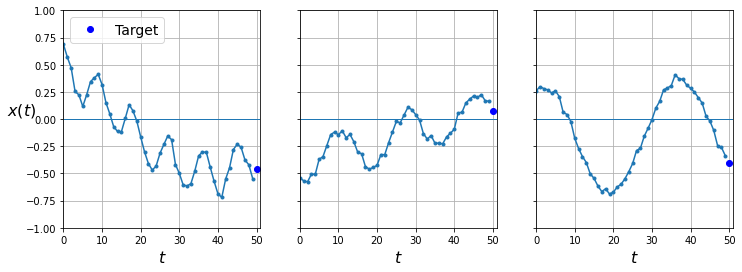

In [28]:
## plot the series
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.show()

In [30]:
## baseline metrics : naive forecasting
## simplest way to predict the last value in each series is naive forecasting.
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.017351745

Here the Mean Squared Error value is 0.017 using the Naive Forecast Method.

BUILD THE MODEL

In [32]:
## another approach is to use fully connected network.
## Using Flatten layer and make fully connected layer.
## use a simple linear regression model so that each prediction will be linear combination of the values in the time series.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [50,1]),
    keras.layers.Dense(1)]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


COMPILE AND TRAIN THE MODEL

In [33]:
model.compile(loss="mse", optimizer="adam")
r = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 2s 3ms/step - loss: 0.1956 - val_loss: 0.0926
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0722 - val_loss: 0.0595
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0514 - val_loss: 0.0470
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0411 - val_loss: 0.0386
Epoch 5/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0340 - val_loss: 0.0329
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0288 - val_loss: 0.0283
Epoch 7/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0250 - val_loss: 0.0246
Epoch 8/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0221 - val_loss: 0.0219
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0197 - val_loss: 0.0199
Epoch 10/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0180 - val_loss: 0.0177

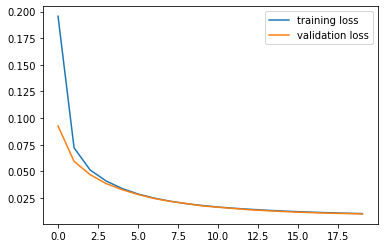

In [35]:
plt.plot(r.history["loss"], label = "training loss")
plt.plot(r.history["val_loss"], label = "validation loss")
plt.legend();
plt.show();

EVALUATE THE MODEL

In [36]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 3ms/step - loss: 0.0101


0.010145014151930809

Here the Mean Squared Error Value is 0.0101. The mse value actually decreased from 0.017 to 0.0101. So this is a better Approach.

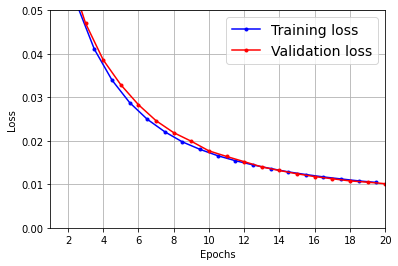

In [40]:
## plot the loss
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(r.history["loss"], r.history["val_loss"])
plt.show();

PREDICT THE MODEL

In [42]:
y_pred = model.predict(X_valid)
print(y_pred)

63/63 [==============================] - 0s 5ms/step
[[-0.54483485]
 [ 0.13313705]
 [-0.3153174 ]
 ...
 [ 0.00582248]
 [ 0.04273911]
 [-0.05945438]]


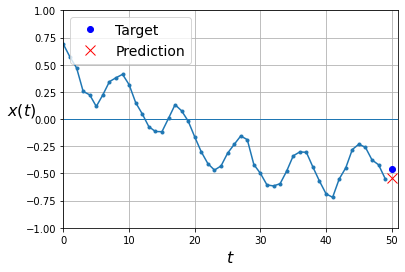

In [43]:
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

Here is the Prediction of the Model is Given in the Figure.

***